In [2]:
# Import necessary libraries for data curation, visualization, and dimensionality reduction.
# If you are re-running this notebook, it could be a good practice to restart kernel and clear outputs of all cells.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA


In [3]:
# Define a custom color palette for visualizing different populations in the dataset.
custom_palette = {
    "EAD_A": "#cada45",  # Green
    "EAD_B": "#d4a2e1",  # Purple
    "EEP": "#55e0c6",    # Blue
    "USA": "#f0b13c",    # Orange
}

In [4]:
# Load population data and covariance matrix from specified files.
filename = 'input_files/SO_2x_thinned1K.cov'
population_names = pd.read_csv('input_files/oryx_pop_info.txt', sep='\t', header=0)
cov_mat = pd.read_csv(filename, sep=' ', header=None)

# Prepare a dataframe to store the analysis results.
Data_Struct = population_names

In [5]:
# Convert the covariance matrix to a numpy array and calculate eigenvalues and eigenvectors.
cov_mat_np = cov_mat.to_numpy()
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat_np)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [6]:
# Select principal components based on sorted eigenvalues.
feature_vector = np.hstack([eigen_pairs[i][1][:, np.newaxis] for i in range(len(eigen_vals))])
principal_components = cov_mat_np.dot(feature_vector) 


# Sort eigenvalues and eigenvectors, calculate explained variance.
idx = eigen_vals.argsort()[::-1]   
eigenValues = eigen_vals[idx]
eigenVectors = eigen_vecs[:,idx]
expl_pre = eigenValues / sum(eigenValues)
expl = np.cumsum(expl_pre)
expl_df = pd.DataFrame(expl_pre * 100, columns=['explained_variance'])
expl_df['cumulative_expl'] = expl * 100
expl_df.set_index(np.arange(1, eigenVectors.shape[0] + 1), inplace=True)



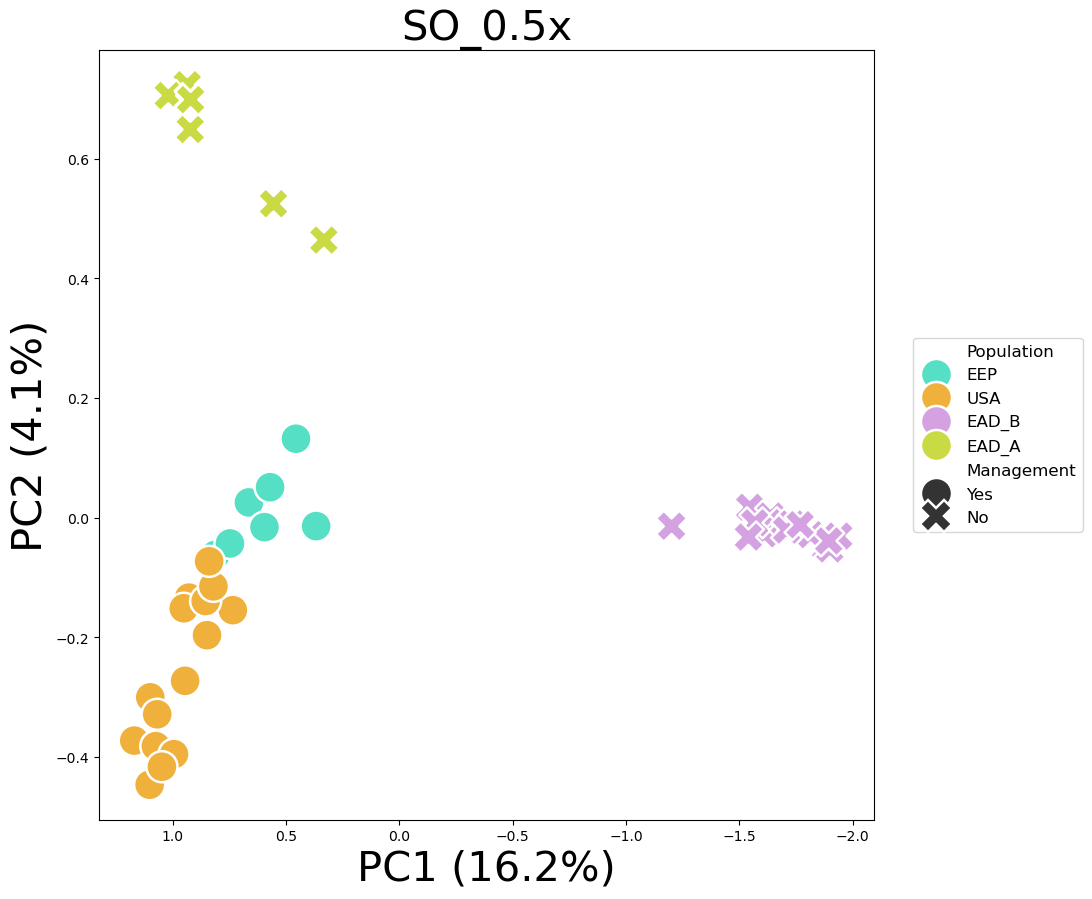

In [8]:
# Add first two principal components to Data_Struct
Data_Struct['PC1'] = principal_components[:, 0]
Data_Struct['PC2'] = principal_components[:, 1]

# Create the PCA scatter plot
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot with custom aesthetics
sns.scatterplot(data=Data_Struct, x='PC1', y='PC2', hue='Population', palette=custom_palette, style='Management', s=500, legend=True)

# Set title and axis labels using explained variance information
ax.set_title('SO_0.5x', fontsize=30)
ax.set_xlabel(f"PC1 ({round(expl_df['explained_variance'][1],1)}%)", fontsize=30)
ax.set_ylabel(f"PC2 ({round(expl_df['explained_variance'][2],1)}%)", fontsize=30)

# Adjust legend placement
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=12)

# Reverse x-axis limits if needed (mirroring your original request)
ax.set_xlim(ax.get_xlim()[::-1])

# Save the figure as a PDF
#plt.savefig('SO_0.5x_PC1+PC2_new.pdf', format='pdf', transparent=False, facecolor='white', bbox_inches='tight', pad_inches=0.1)

# Show the plot if needed
plt.show()

# 